## Clustering

**Course:** HUDK4050, Week 7

**Author:** Yutong Shen

**Assignment:** ICE5

### Clustering and K-Means 

First, let's begin with the standard imports. And then generate a two-dimensional dataset containing four distinct groups by make_blobs for demonstration purposes. We will leave the labels out of the visualization.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Next, let's simulate some data on a two-dimensional plane with make_blobs. This function will return two things, (a) a set of data and (b) the true labels for each observation. We are going to store them in two variables: twoDData and cluster_true.

In [2]:
from sklearn.datasets import make_blobs # import make_blobs to help us simulate some data

twoDData, cluster_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)

print("Here are the first 10 rows of twoDData:")
print(twoDData[:10])
print("Here are the true labels for each observation. But we don't need it.")
print(cluster_true[:10])

Here are the first 10 rows of twoDData:
[[ 1.03992529  1.92991009]
 [-1.38609104  7.48059603]
 [ 1.12538917  4.96698028]
 [-1.05688956  7.81833888]
 [ 1.4020041   1.726729  ]
 [ 3.20722587  0.36765575]
 [-1.76133611  1.81716162]
 [ 1.34081536  4.36827878]
 [-0.37881944  8.33265721]
 [-0.80062564  8.52294205]]
Here are the true labels for each observation. But we don't need it.
[1 3 0 3 1 1 2 0 3 3]


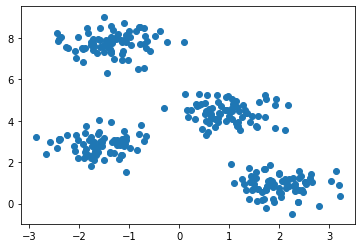

In [3]:
plt.scatter(twoDData[:, 0], twoDData[:, 1]);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically through sklearn.

In [4]:
from sklearn.cluster import KMeans

KMeans() is fairly straight-forward. We need to:

1. Initialize the model by telling KMeans() the number of k.
2. Feed the data to the model.
3. Call predict() and use the data to get the clustering result.

Note. In some tutorials, you might find KMeans() use a extra parameter called random_state. It is used for seeding. You can use any number.

In [5]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(twoDData)
cluster_kmeans = kmeans.predict(twoDData)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

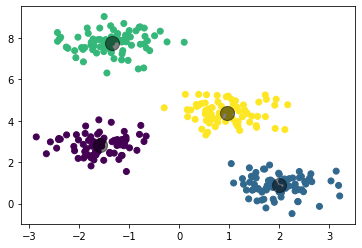

In [6]:
plt.scatter(twoDData[:, 0], twoDData[:, 1], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); # plotting the centers onto scatter plot
                                                                        # c is for color, s is for dot size, and alpha is for transparency

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. 

### Silhoutte Coefficient and Silhoutte Plot

The Silhouette Coefficient is used when the ground-truth about the dataset is unknown and computes the density of clusters computed by the model. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for all samples. The Silhouette Coefficient for a sample is (b−a)/max(a,b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This process produces a score between 1 and -1, where 1 is highly dense clusters and -1 is completely incorrect clustering.

From sklearn.metrics, we can call silhouette_score. This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

In [7]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(twoDData, cluster_kmeans, metric='euclidean')

# Print the score
print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.7356713838266389


If you want to obtain the silhouette plot. The quickest way to do is through the Silhouette Visualizer, which displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for  
K by comparing multiple visualizers.

This requires yellowbrick package that is not pre-installed in Anaconda.

You will use this conda install -c districtdatalabs yellowbrick.

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer

In [9]:
smodel = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')

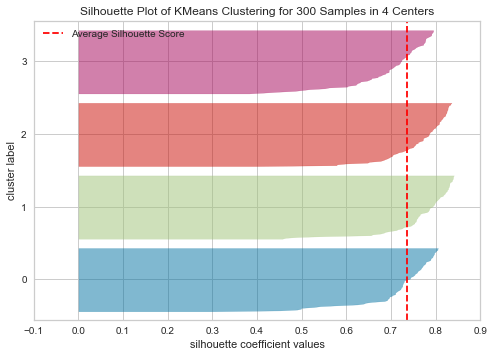

In [10]:
visualizer.fit(twoDData) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure.
## These two lines needs to be run at the same time otherwise, you won't have the labels in x,y axies.

The same functionality above can be achieved with the associated quick method silhouette_visualizer. This method will build the Silhouette Visualizer object with the associated arguments, fit it, then immediately show it.

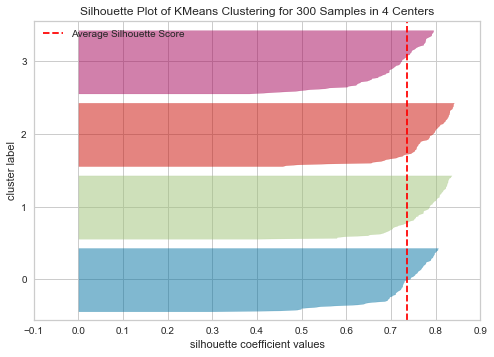

dict_keys(['ax', 'colors', 'estimator', 'is_fitted']) 


dict_keys(['ax', 'colors', 'estimator', 'is_fitted']) 




SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f841b663850>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

In [11]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, twoDData, colors='yellowbrick')

### Clustering with k-Means: Self-Reported Motivation

We will be looking at a more realistic example of students' self-reported motivaiton. The data contains some self-reported motivation scores for a class over five weeks. We are going to look for patterns in motivation over this time and sort people into clusters based on those patterns.

In [12]:
motivation = pd.read_csv("ICE5_Data.csv")
motivation

,id,motivation1,motivation2,motivation3,motivation4,motivation5
0,10005216,2,2.0,2,2.0,2.0
1,10033216,3,NaN,3,NaN,NaN
2,10004216,1,2.0,1,2.0,2.0
3,10008216,1,2.0,1,2.0,NaN
4,10026216,3,NaN,3,NaN,NaN
5,10014216,2,NaN,2,NaN,2.0
6,10021216,2,2.0,2,2.0,2.0
7,10013216,2,NaN,2,NaN,1.0
8,10035216,2,3.0,2,3.0,NaN
9,10015216,2,2.0,2,2.0,2.0


We will need to manipulate the data frame into a structure that can be analyzed by our clustering algorithm.

The algorithm will treat each row as a value belonging to a person, so we need to remove the id variable. And we also need to filter out all the NAs because k-Means won't work if it only sees partial data.

In [13]:
motivationNA = motivation.dropna()
motivationClean = motivationNA.drop(['id'], axis = 1)
motivationClean

,motivation1,motivation2,motivation3,motivation4,motivation5
0,2,2.0,2,2.0,2.0
2,1,2.0,1,2.0,2.0
6,2,2.0,2,2.0,2.0
9,2,2.0,2,2.0,2.0
11,2,1.0,2,1.0,2.0
13,2,3.0,2,3.0,1.0
14,1,1.0,1,1.0,4.0
16,1,1.0,1,1.0,3.0
17,1,1.0,1,1.0,1.0
18,1,1.0,1,1.0,1.0


Let's fit a two-cluster model first and check out the silhouette plot as well as the coefficient.

In [14]:
# Try 2 clusters first
motivationkmeans2 = KMeans(n_clusters=2)
motivationkmeans2.fit(motivationClean)
cluster_motivation2 = motivationkmeans2.predict(motivationClean)

The score is 0.43 and the silhouette plot is not too bad. We can see that Cluster 0 has a lot more similarities while Cluster 1 is more heterogeneous. So we may want to increase the cluster number.

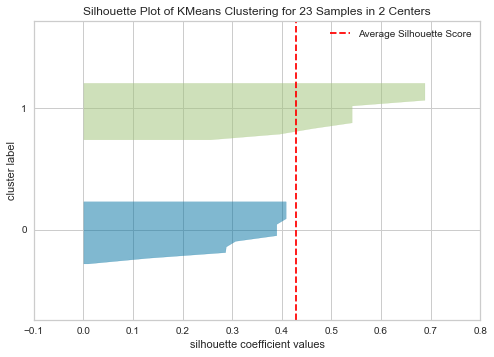

Silhouetter Score: 0.4278253443934091


In [15]:
silhouette_visualizer(motivationkmeans2, motivationClean, colors='yellowbrick')

silhouetteScore2 = silhouette_score(motivationClean, cluster_motivation2, metric='euclidean')

print('Silhouetter Score:', silhouetteScore2)

The cluster_n = 3 below seems more reasonable. The silhouette coefficient increases and all three clusters all have similar intra-cluster similarity (i.e., flat head).

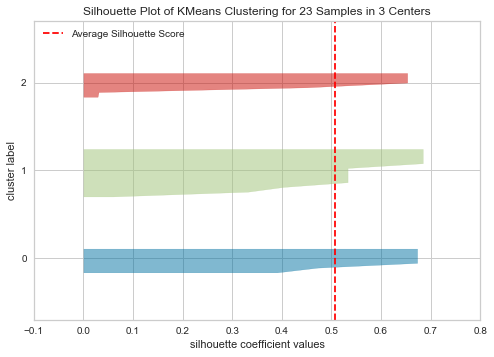

Silhouetter Score: 0.5078715772811808


In [16]:
# Try 3 clusters

motivationkmeans3 = KMeans(n_clusters=3)
motivationkmeans3.fit(motivationClean)
cluster_motivation3 = motivationkmeans3.predict(motivationClean)
silhouette_visualizer(motivationkmeans3, motivationClean, colors='yellowbrick')
silhouetteScore3 = silhouette_score(motivationClean, cluster_motivation3, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

This is the cluster_n = 4 case. Not too much different. The silhouette coefficient drops and all four clusters all still have similar intra-cluster similarity. So we will say cluster_n = 3 is a more reasonable classification.

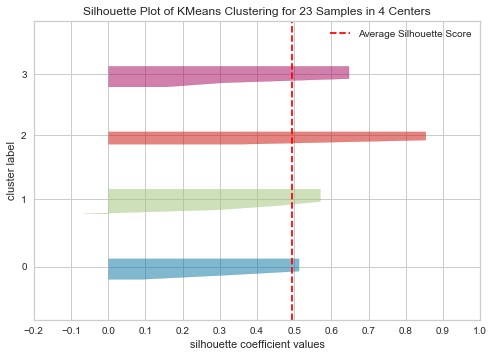

Silhouetter Score: 0.4939757511461826


In [17]:
# Try 4 clusters

motivationkmeans4 = KMeans(n_clusters=4)
motivationkmeans4.fit(motivationClean)
cluster_motivation4 = motivationkmeans4.predict(motivationClean)
silhouette_visualizer(motivationkmeans4, motivationClean, colors='yellowbrick')
silhouetteScore4 = silhouette_score(motivationClean, cluster_motivation4, metric='euclidean')
print('Silhouetter Score:', silhouetteScore4)

Now let's create a new dataframe to contain the clustering result. The regular = wouldn't work because motivationClean will be changed as motivation3cluster changes. 

In [18]:
motivation3cluster = motivationClean.copy(deep=True)

motivation3cluster['cluster'] = cluster_motivation3

motivation3cluster

,motivation1,motivation2,motivation3,motivation4,motivation5,cluster
0,2,2.0,2,2.0,2.0,0
2,1,2.0,1,2.0,2.0,2
6,2,2.0,2,2.0,2.0,0
9,2,2.0,2,2.0,2.0,0
11,2,1.0,2,1.0,2.0,2
13,2,3.0,2,3.0,1.0,0
14,1,1.0,1,1.0,4.0,1
16,1,1.0,1,1.0,3.0,1
17,1,1.0,1,1.0,1.0,2
18,1,1.0,1,1.0,1.0,2


Using silhouette plot is one way to determine the number of clusters. Another simple way is through something called the elbow method. It uses the sum of squared distances of samples to their closest cluster center (i.e., k-Means method's stopping rule) to gauge when to stop. The implementation will require you to know how to write a loop. 